Estudiamos en las clases anteriores el metodo PACF (Partial Autocorrelation Function). Este metodo sirve para diagnosticar
el orden de un proceso AR(p). Por ejemplo si p=2, la funcion de autocorrelacion parcial debe tener 3 "spikes" (contando $\rho_0=1$. Es decir, dos "spikes" adicionales. 

# The MA(q): Moving Average Process:
Un ejemplo hipotetico de un MA para predecir precios de acciones.

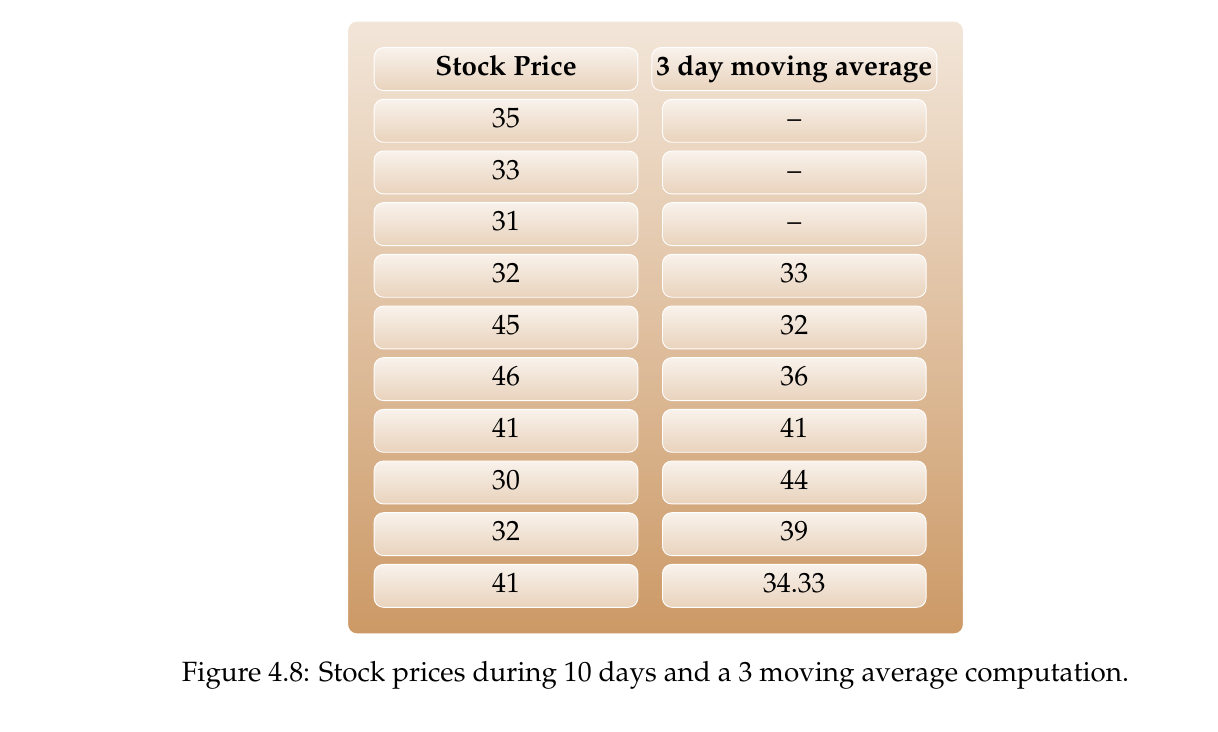

Antes de introducir la deficion precisa de un MA(q), veamos como los promedios desplazantes sirven para suavizar funciones. Es decir, son filtros que suavizan las funciones removiendo las altas frecuencias. Es un filtro **pasa bajos**  o **corta altos **

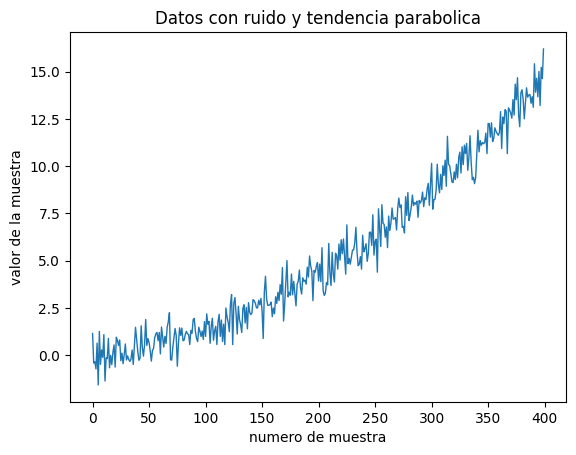

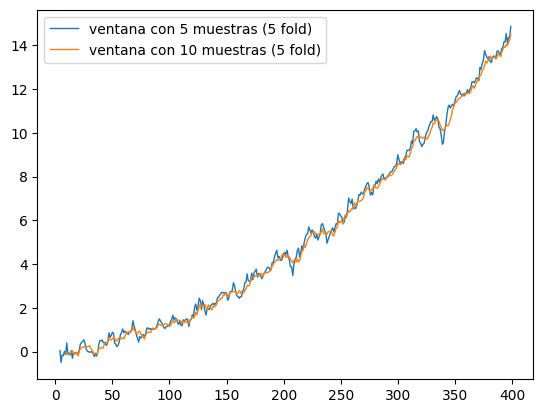

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)
mu, sigma = 0, 0.7
N=400
Z = np.random.normal(mu, sigma, N)

# parametros para una funcion quadratica
a=0.5
b=0.8

X = np.zeros(N)
for i in range(N):
    X[i] = Z[i] + a*i/100 + b*i**2/10000

df = pd.DataFrame(X)
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title("Datos con ruido y tendencia parabolica")
plt.plot(X, label="datos orginales", linewidth=1.0)
plt.show()


# Vamos  hacer varios "filtros" de tipo MA y los sobreponemos
# usamos Pandas
df2 = df.rolling(window=5).mean()
df3 = df.rolling(window=10).mean()
plt.plot(df2 , label="ventana con 5 muestras (5 fold)", linewidth=1.0)
plt.plot(df3 , label="ventana con 10 muestras (5 fold)", linewidth=1.0)
plt.legend()
plt.show()



# Definicion formal de MA(q)
Este se define mediante la ecuacion

$$X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \cdots \beta_{\textrm{q}} Z_{t-\textrm{q}} + c  \quad (1)$$

La definicion es una **convolucion** de el ruido con un "filtro" que son
los coeficientes $\beta_0 , \beta_1 , \cdots, \beta_{\textrm{q}}$.

$$ X_t = \sum_{i=0}^{\textrm{q}} \beta_i Z_{t-i}  + c $$
no hay restriccion sobre los $\beta_i$, $i=1,2, \cdots, \textrm{q} \in \mathbb{R} $ excepto que son reales. 

En la literatura es comun encontrar $\beta_0=1$, es decir.

$$X_t = Z_t + \beta_1 Z_{t-1} + \cdots +  \beta_{\textrm{q}} Z_{t-\textrm{q}} + c   \quad (2) $$

En la ecuacion (1) necesitariamos calcular q+1 coeficientes y en la (2)
q coeficientes (sin contar $c$). 

Para la historia de este modelo los refiero a mis notas de clase. 




## Media y Varianza de un MA(q).

### Media

Es importante para lo que viene recordar que

* $\mu_{Z_t}$ = 0
* $\sigma_{Z_t}$ = 0
* Que son estacionarias, es decir que $\mu_{Z_t} = \mu_{Z_{t+\tau}}$, para
todo $\tau$, e igual igual con la desivacion estandar.

$$\mathbb{E}[X_t] = \beta_0 \mathbb{E}[Z_t] + \beta_1 \mathbb{E}[Z_{t-1}] + \cdots +  \beta_{\textrm{q}} \mathbb{E}[Z_{t-\textrm{q}}]  + \mathbb{E}[c]  = c =\mu_{X_t} \quad (3) $$
La media de una serie de tiempo MA(q) es $c$.

### Varianza
Recuerden que la varianza de la suma es la suma de las varianzas mas
2 veces las covarianzas entre los cruzados $\text{Cov}[X_i, X_j]$ $i \ne j$. Pero los cruzados con ruidos independientes y no tienen correlacion alguna, o sea que las covarianzas de los cruzados son 0. 
Recuerden tambien que $\mathbb{V}[a X] = a^2 \mathbb{V}[X]$ donde $X$ es una variable
aleatoria y $a \in \mathbb{R}$. 

De forma que 

$$\mathbb{V}[X_t] = \mathbb{V} [ Z_t] + \beta_1 Z_{t-1} + \cdots +  \beta_{\textrm{q}} Z_{t-\textrm{q}} + c]    $$
Asumiendo $c=0$ tenemos entonces

$$\mathbb{V}[X_t] = \sum_{i=0}^q \beta_i^2 \mathbb{V}[Z_{t-i}] = \sigma_Z \sum_{i=0}^q \beta_i^2 . $$




## Funciones de Autocorrelacion (ACF)
Vamos a asumir que $c=0$, entonce s\mu_{X_t} = 0$. 


\begin{eqnarray}
\gamma_{\tau} &=& \text{Cov}[X_t, X_{t+\tau}] \\
&=& \mathbb{E}[X_t X_{t+\tau}] - \mathbb{E}[X_t] \mathbb{E}[X_{t+\tau}] \\
&=& \mathbb{E}[X_t X_{t+\tau}] \\
&=& \mathbb{E} \left [ \sum_{j=0}^{\text{q}} \beta_j Z_{t-j} \sum_{k=0}^{\text{q}} \beta_k Z_{t-k+\tau} \right ] \\
&=&  \sum_{j=0}^{\text{q}} \sum_{k=0}^{\text{q}} \beta_j \beta_k \mathbb{E}[ Z_{t-j} Z_{t-k+\tau}]
\end{eqnarray}

Como $Z_j$ es ruido blanco los las covarianzas entre $Z_{t-j}$ y $Z_{t-k+\tau}$ son todas cero excepto cuando $t-j = t-k+\tau$. 
Es decir cuando $k= \tau + j$. Introducimos del delta de Kronecker

$\delta_{k \, \tau+j}$ que es $1$ cuando $k=\tau+j$ y 0 en cualquier otro caso.

De forma que

\begin{eqnarray}
\gamma_{\tau} &=&   \sum_{j=0}^{\text{q}} \sum_{k=0}^{\text{q}} \beta_j \beta_k \mathbb{E}[ Z_{t-j} Z_{t-k+\tau}] \delta_{k \, \tau + j} \\
&=& \sum_{j=0}^{\text{q}} \beta_j \beta_{\tau + j} \mathbb{E}[Z_{t-j} Z_{t-\tau -j + \tau}] \\
&=& \sum_{j=0}^{\text{q}} \beta_j \beta_{\tau + j} \mathbb{E}[Z_{t-j} Z_{t -j}] \\
&=& \sum_{j=0}^{\text{q}} \beta_j \beta_{\tau + j} \sigma_Z^2 \\
&=& \sigma_Z^2  \sum_{j=0}^{\text{q}} \beta_j \beta_{\tau + j} 
\end{eqnarray}

Hay restricciones que hay que tener en cuenta.

* $\tau+j \le \text{q}$: O sea qaue $j \le q - \tau$, y escribir

$$ \gamma_{\tau} = \sigma_Z^2  \sum_{j=0}^{\text{q}-\tau} \beta_j \beta_{\tau + j} $$

* $\tau \le q$ por que de otra forma la suma no existe. 
En resumen tenemos que

\begin{eqnarray}
\gamma_{\tau} = 
\left \{ 
    \begin{array}{cc}
    \sigma_Z^2  \sum_{j=0}^{\text{q}-\tau} \beta_j \beta_{\tau + j} & 0 \le \tau \le q \\
    0 & \tau > q
    \end{array}
    \right .
\end{eqnarray}
Asumimos $\tau$, y sabemos que $\gamma_{\tau} = \gamma_{-\tau}$. 

La ACF se obtiene dividiendo la anterior por $\gamma_0$:

$$ \gamma_0 = \sigma_Z^2 \sum_{j=0}^{\text{q}} \beta_j^2 $$

De forma que la ACF:

\begin{eqnarray}
\rho_{\tau} = 
\left \{ 
    \begin{array}{cc}
      \frac{\sum_{j=0}^{\text{q}-\tau} \beta_j \beta_{\tau + j}}{\sum_{j=0}^{\text{q}} \beta_j^2} & 0 \le \tau \le q \\
    0 & \tau > q
    \end{array}
    \right .
\end{eqnarray}

Note que $\rho_0=1$ ademas $\rho_{\tau}=\rho_{-\tau}$. 
Una conclusion importante es que la ACF determina el orden q de un MA(q). 

Casos particulares. Asumamos $\beta_0=1$,

* $\rho_1$:  Solo tiene un coeficiente despues del $\rho_0=1$. $\rho_1$?





$$ \rho_1 = \frac{\beta_0 \beta_1 }{\beta_0^2 + \beta_1^2}= \frac{\beta_1}{1 + \beta_1^2}$$

* $\rho_2$ para MA(2) 
$$ \rho_2 = \frac{\beta_0 \beta_2 }{\beta_0^2 + \beta_1^2 + \beta_2^2} = \frac{ \beta_2 }{1 + \beta_1^2 + \beta_2^2} $$

Tambien podemos calcular $\rho_1$ para un MA(2).

$q=2$, $\tau=1$ encontramos

$$ \rho_1 =  \frac{\beta_0 \beta_1 + \beta_1 \beta_2}{\beta_0^2 + \beta_1^2 + \beta_2^2} = \frac{\beta_1 + \beta_1 \beta_2}{1 + \beta_1^2 + \beta_2^2} $$

Podemos calcular analiticamente la funcion ACF de los coeficientes $\beta_i$. Esto lo verificamos, en la proxima clase con Python.

Una observacion interesante: Tomemos $\rho_1$ en MA(1)
cambiemos $\beta_1$ por $1/\beta_1$. Que pasa?


$$ \rho_1= \frac{\beta_1}{1 + \beta_1^2}$$


$$ \frac{1/\beta_1}{1 + (1/\beta_1)^2} $$
Multiplicando arriba y abajo por $\beta_1^2$ encontramos

$$ \frac{\beta_1 }{\beta_1^2 + 1 } = \rho_1 $$
Entonces si por ejemplo $\beta_1=0.2$ lo modificamos
por $\beta_1=5$ el $\rho_1$ da igual en un MA(1). 
Hay un "ambiguedad". En este caso debemos elegir el coeficiente que haga el sistema estable. Veremos, tal vez en la proxima clase que para que el sistema se estable, $| \beta_1 | < 1$, es decir, nos quedamos con $\beta_1=0.2$.

Lo que sigue es el PACF

# PACF


